# ECBM E4040 - Assignment 2 - Task 4: Data Augmentation

One important factor in neural network training is the size of the traininig set. Since it is often not possible to get a clean and large enough dataset for training, one way to improve the network's robustness and generalization ability is to create 'fake' data by injecting random noise or doing random transformations on the available data. A technique which implements this strategy is called __data augmentation__, and has shown to be very effective.

One thing to remember, when you augment your data, is to never change the correct label of a sample. For example, for hand-written digit dataset, flipping a letter 'b' ends up looking like a letter 'd', but you must keep the label for 'b'. So please choose the best augmentation methods for your dataset.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
from __future__ import print_function
import numpy as np
from ecbm4040.cifar_utils import load_data
import matplotlib.pyplot as plt

## Load Data

In [2]:
X_train, y_train, X_test, y_test = load_data()

num_train = 20000 #49000 , cut down on memory
num_val = 1000
num_test = 10000
num_dev = 128

# The development set is used for augmentation practices.
mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Seperate Training set into a training set and a validation set
X_val = X_train[num_train:]
y_val = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]

X_val = X_val.reshape([-1,32,32,3])/255
X_train = X_train.reshape([-1,32,32,3])/255


print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
(20000, 32, 32, 3) (30000, 32, 32, 3) (10000, 3072) (128, 3072)


## Part 1: Visualization

### Visualize some original images

<span style="color:red">__TODO:__</span> Use Pyplot to draw any 16 samples from the __development set__ in a 4-by-4 grid.

__Hint__: The original data is vectorized, you need to find a way to reshape it into 32*32 RGB image.

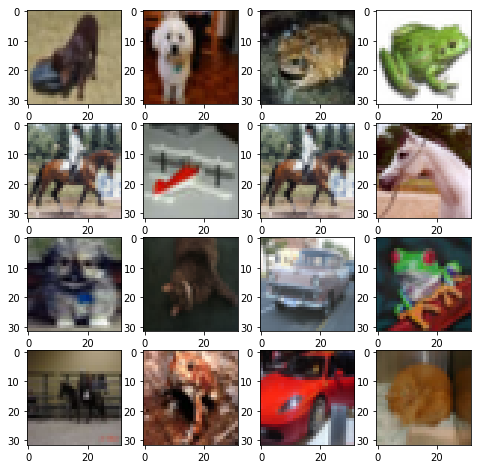

In [3]:
r = 4
f, axarr = plt.subplots(r, r, figsize=(8,8))

for i in range(r):
    for j in range(r):

        img_flat = X_dev[np.random.choice(X_dev.shape[0],1),:].flatten()
        img_R = img_flat[0:1024].reshape((32, 32))
        img_G = img_flat[1024:2048].reshape((32, 32))
        img_B = img_flat[2048:3072].reshape((32, 32))
        img = np.dstack((img_R, img_G, img_B))
        axarr[i][j].imshow(img)


## Part 2: Automatic batch generator

We want you to create an automatic image generator that does several kinds of data augmentations, and produces a batch of data consisting of random samples every time you call it. 

<span style="color:red">__TODO__:</span> Finish the functions of class __ImageGenerator__ in __ecbm4040/image_generator.py__. The code is fully commented with instructions.

__Hint__: The python keywords __yield__ and __next__ can help you do some tricks.

In [ ]:
from ecbm4040.image_generator import ImageGenerator

<span style="color:red">__TODO__:</span> Create an ImageGenerator object using the __development set__, and use __show__ function to plot the top 16 original images.

In [ ]:
def reshapeImg(X,idx):
    img_flat = X[idx,:].flatten()
    img_R = img_flat[0:1024].reshape((32, 32)) / 255
    img_G = img_flat[1024:2048].reshape((32, 32)) / 255
    img_B = img_flat[2048:3072].reshape((32, 32)) /255
    img = np.dstack((img_R, img_G, img_B))
    return img

def reshapeArray(X):
    container = np.ndarray((X.shape[0],32,32,3))
    for n in range(X.shape[0]):
        container[n] = reshapeImg(X,n)

    return container



In [ ]:
dev_gen = ImageGenerator(reshapeArray(X_dev), y_dev)
dev_gen.show()

### Translation

<span style="color:red">__TODO:__</span> Translate the original __development set__ by several pixels in both directions, and plot the top 16 images like you just did.

In [ ]:
del dev_gen
dev_gen = ImageGenerator(reshapeArray(X_dev), y_dev)

dev_gen.translate(shift_height=10, shift_width= -10)

dev_gen.show()

### Rotation

<span style="color:red">__TODO:__</span> Rotate the original __development set__ by several degrees, and plot the top 16 images like you just did. 

In [ ]:
from scipy.ndimage.interpolation import rotate

test = reshapeArray(X_dev)
plt.imshow(test[2])


plt.imshow(rotate(test[2], angle = 2 , axes=(0,1)))

plt.imshow(np.flip(test[0], axis = 0))

In [ ]:
# YOUR CODE HERE
del dev_gen
dev_gen = ImageGenerator(reshapeArray(X_dev), y_dev)

dev_gen.rotate(angle=-1)

dev_gen.show()

### Flipping (horizontal and vertical)

<span style="color:red">__TODO:__</span> Flip the original __development set__ as you like (horizontal, vertical, or both), and plot the top 16 images like you just did. 

In [ ]:
# YOUR CODE HERE
del dev_gen
dev_gen = ImageGenerator(reshapeArray(X_dev), y_dev)

dev_gen.flip(mode= 'hv')

dev_gen.show()

### Add Noise

<span style="color:red">__TODO:__</span> Inject random noise into the original __development set__, and plot the top 16 images like you just did.

In [ ]:
# YOUR CODE HERE
del dev_gen
dev_gen = ImageGenerator(reshapeArray(X_dev), y_dev)

#normally distributed 
dev_gen.add_noise(portion=.05, amplitude=.5)
dev_gen.show()

## Part 3: Data Augmentation + LeNet

<span style="color:red">__TODO__:</span> Now that you have your own data generator. At the end of __ecbm4040/neuralnets/cnn.py__, there is a not-implemented function __my_training_task4()__. Copy the __my_training()__ function above and modify it so that it uses your data generator for training. Train the network again - whether you see and improvement or a drop, record it and analyze why.

In [ ]:

test_generator = ImageGenerator(reshapeArray(X_dev), y_dev)
train = test_generator.next_batch_gen(batch_size=30)

for i in range(3):
    (X, y) = next(train)

    print(X.shape)

X.reshape(X.shape[0], np.prod(X.shape[1:])).shape
y.shape

In [10]:
from ecbm4040.neuralnets.cnn import my_training_task4
import tensorflow as tf
tf.reset_default_graph()


## batch iterator is giving an empty batch at the end , not getting to the else condition

result , cache = my_training_task4( X_train, y_train, X_val, y_val, 
             conv_featmap=[5],
             fc_units=[84, 84],
             conv_kernel_size=[3],
             pooling_size=[2],
             l2_norm= .001,
             seed=235,
             use_adam = True,
             learning_rate= 1e-3,
             epoch=20,
             batch_size=250,
             verbose=False,
             pre_trained_model=None)

# YOUR CODE HERE

Building my LeNet. Parameters: 
conv_featmap=[5]
fc_units=[84, 84]
conv_kernel_size=[3]
pooling_size=[2]
l2_norm=0.001
seed=235
learning_rate=0.001
number of batches for training: 80
epoch 1 
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32, 32, 3)
(250, 32,

ResourceExhaustedError: Ran out of GPU memory when allocating 0 bytes for 
	 [[Node: loss/SoftmaxCrossEntropyWithLogits = SoftmaxCrossEntropyWithLogits[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"](loss/Reshape, loss/Reshape_1)]]
	 [[Node: loss/loss/_15 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_631_loss/loss", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'loss/SoftmaxCrossEntropyWithLogits', defined at:
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-e2e00503355f>", line 19, in <module>
    pre_trained_model=None)
  File "/home/ecbm4040/assignment2/ecbm4040/neuralnets/cnn.py", line 325, in my_training_task4
    seed=seed)
  File "/home/ecbm4040/assignment2/ecbm4040/neuralnets/cnn_sample.py", line 189, in LeNet
    tf.nn.softmax_cross_entropy_with_logits(labels=label, logits=fc_layer_1.output()),
  File "/home/ecbm4040/.local/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 1597, in softmax_cross_entropy_with_logits
    precise_logits, labels, name=name)
  File "/home/ecbm4040/.local/lib/python3.5/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 2385, in _softmax_cross_entropy_with_logits
    features=features, labels=labels, name=name)
  File "/home/ecbm4040/.local/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/ecbm4040/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/ecbm4040/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): Ran out of GPU memory when allocating 0 bytes for 
	 [[Node: loss/SoftmaxCrossEntropyWithLogits = SoftmaxCrossEntropyWithLogits[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"](loss/Reshape, loss/Reshape_1)]]
	 [[Node: loss/loss/_15 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_631_loss/loss", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
